<a href="https://colab.research.google.com/github/Thcataclismo/Bootcamp-analista-de-Machine-learn-IGTI-XPE-/blob/main/REGRESSAO_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#REGRESSAO ULTILZANDO O OTIMIZADOR
#DEFININDO AS BIBLIOTECAS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
#DEFININDO AS VARIAEIS
idade= [18,25, 43, 37, 58, 37, 26, 16, 36, 27]
salarioAnual= [15000, 20000, 30000, 20000, 15000, 40000, 50000, 30000, 80000, 100000 ]

xData = np.array(idade)
yData = np.array(salarioAnual)

In [ ]:
#DEFINE A FUNCAO A SER OTIMIZADA (REGRESSAO SIMPLES)
def equacaoLinear(x, a, b):
  return a * x + b

In [ ]:
#GERA OS PARAMETROS INICIAIS PARA O OTIMIZADOR
Parametro = np.array([1.0, 1.0])

In [ ]:
#REALIZA A OTIMIZACAO ATRAVEZ DO ERRO MEDIO QUADRADO(MSE)
parametrosotimizados, pcov = curve_fit(equacaoLinear, xData, yData, Parametro)

In [ ]:
#REALIZA PREVISAO DOS DADOS ATRAVES DO MODELO (CONSTROI A EQUAÇAO LINEAR)
previsaomodelo = equacaoLinear(xData, *parametrosotimizados)

In [ ]:
#ENCONTRA O ERRO ABSOLUTO (LINHAS VERTICAIS)
erroAbsoluto = previsaomodelo - yData

In [ ]:
#CALCULAR O ERRO QUADRADO ENTRE CADA MEDIDA
SE = np.square(erroAbsoluto)
#CALCULA O MSE
MSE = np.mean(SE)
print('SE; ', SE)
print('MSE: ', MSE)

SE;  [8.47798819e+08 4.88484157e+08 4.78789100e+07 3.47705578e+08
 3.09793196e+08 1.83097407e+06 6.70142527e+07 2.15877994e+08
 1.68635343e+09 3.41922322e+09]
MSE:  743196053.6479189


In [ ]:
#REALIZA CALCULO DE COEFICIENTE DE DETERMIAÇAO
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('coeficiente de Determinação:', Rsquared)

coeficiente de Determinação: 0.015634366029246283


In [ ]:
#MOSTRAR OS PARAMETRS DA REGREASSAO
print('Y = {}X {}'.format(parametrosotimizados[0], parametrosotimizados[1]))

Y = -287.901050492531X 49299.20396472823


Text(0, 0.5, 'salarioAnual (R$)')

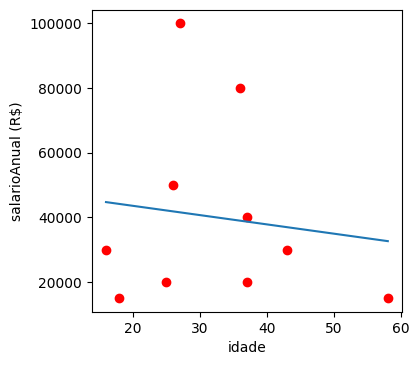

In [ ]:
#REALIZAR PLOT DA FIGURA 
from pandas.io.formats.style import plt
f = plt.figure(figsize=(4, 4 ), dpi=100)
axes = f.add_subplot(111)

axes.plot(xData,yData, 'ro')

xModel = np.linspace(min(xData), max(xData))
yModel = equacaoLinear(xModel, *parametrosotimizados)

axes.plot(xModel, yModel)
plt.xlabel('idade')
plt.ylabel('salarioAnual (R$)')

# **Regrassao linear com SKLEARN**

In [ ]:
#REALIZ A CONSTRUÇAO DO MODELO DE REGRESSAO
reg = LinearRegression()
X_Modelosklearn=xData.reshape((-1, 1))
regressao = reg.fit (X_Modelosklearn, yData)

In [ ]:
previsao = reg.predict(X_Modelosklearn)

In [ ]:
MSE = mean_squared_error(yData, previsao)
print('MSE: ', MSE)

MSE:  743196053.647918


In [ ]:
print ('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(yData, previsao)

print('coeficiente de determinaçaõ (R2):' , R_2)

Y = [-287.90113054]X 49299.20651639632
coeficiente de determinaçaõ (R2): 0.015634366029247726


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving headbrain.csv to headbrain (1).csv


In [ ]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

In [ ]:
reg = LinearRegression()
X_Reshaped=x.reshape((-1,1))
regressao = reg.fit (X_Reshaped, y)

In [ ]:
previsao = reg.predict(X_Reshaped)

In [ ]:
print ('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)

print('coeficiente de determinaçaõ (R2):' , R_2)

Y = [0.26342934]X 325.5734210494426
coeficiente de determinaçaõ (R2): 0.639311719957


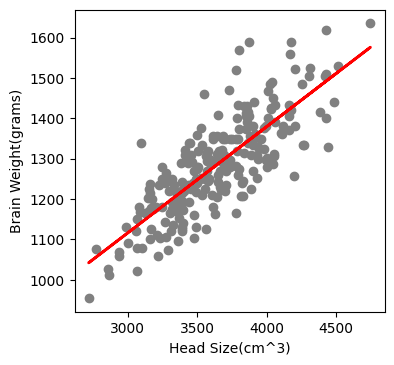

In [ ]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x,y , color='gray')
plt.plot(x,previsao, color='red', linewidth=2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()